In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
df=pd.read_csv("C:/Users/Administrator/Desktop/GlobalTemperature/GlobalLandTemperaturesByCity.csv")
df.head(3)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


In [152]:
df.isna().sum()

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

In [153]:
df.shape

(8599212, 7)

In [154]:
df = df.dropna(subset=['AverageTemperature', 'AverageTemperatureUncertainty'])

In [155]:
df.isna().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [156]:
df['dt'] = pd.to_datetime(df['dt'])

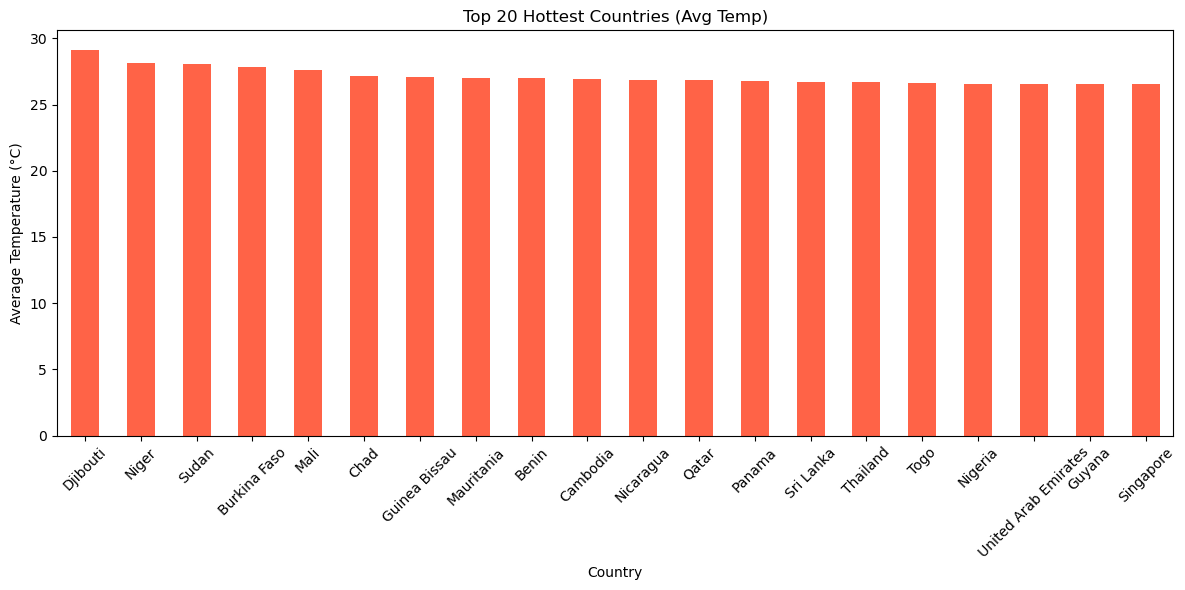

In [157]:
avg_temp_country = df.groupby('Country')['AverageTemperature'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
avg_temp_country.head(20).plot(kind='bar', color='tomato')
plt.title('Top 20 Hottest Countries (Avg Temp)')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [158]:
avg_temp_city = df.groupby(['City', 'Country'])['AverageTemperature'].mean().sort_values()
print("Coldest Cities:")
print(avg_temp_city.head(10))

Coldest Cities:
City          Country 
Norilsk       Russia     -11.854750
Kyzyl         Russia      -6.222452
Chita         Russia      -4.360300
Ust Ilimsk    Russia      -3.996800
Surgut        Russia      -3.538281
Nefteyugansk  Russia      -3.538281
Ulaanbaatar   Mongolia    -3.365485
Ulan Ude      Russia      -3.179915
Bratsk        Russia      -2.817985
Yakeshi       China       -2.512980
Name: AverageTemperature, dtype: float64


In [159]:
print("Hottest Cities:")
print(avg_temp_city.tail(10))

Hottest Cities:
City        Country 
Tirupati    India       28.417858
Avadi       India       28.417858
Rabak       Sudan       28.598226
Kusti       Sudan       28.598226
Mopti       Mali        28.784449
Kassala     Sudan       28.938776
Niamey      Niger       29.062560
Khartoum    Sudan       29.081291
Umm Durman  Sudan       29.081291
Jibuti      Djibouti    29.152790
Name: AverageTemperature, dtype: float64


In [160]:
temp_range = df.groupby(['City', 'Country'])['AverageTemperature'].agg(['min', 'max'])
temp_range['range'] = temp_range['max'] - temp_range['min']
top_range = temp_range.sort_values('range', ascending=False).head(10)
print("Cities with Most Extreme Temp Ranges:")
print(top_range)

Cities with Most Extreme Temp Ranges:
                           min     max   range
City           Country                        
Yichun         China   -30.421  30.589  61.010
Norilsk        Russia  -42.704  16.872  59.576
Ust Ilimsk     Russia  -37.713  21.310  59.023
Kyzyl          Russia  -41.101  17.715  58.816
Hailar         China   -34.940  22.891  57.831
Yakeshi        China   -34.940  22.891  57.831
Nizhnevartovsk Russia  -34.846  21.408  56.254
Nehe           China   -32.378  23.432  55.810
Bratsk         Russia  -34.932  20.802  55.734
Heihe          Russia  -31.874  23.435  55.309


In [161]:
df['month'] = df['dt'].dt.month
df['season'] = df['month'] % 12 // 3 + 1  # 1: Winter, 2: Spring, 3: Summer, 4: Fall
season_map = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
df['season'] = df['season'].map(season_map)

Text(0, 0.5, 'Temp (°C)')

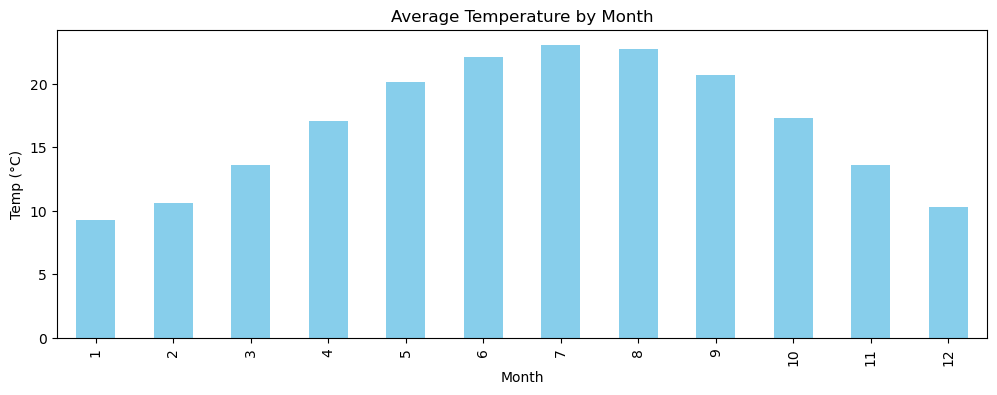

In [162]:
monthly_avg = df.groupby('month')['AverageTemperature'].mean()
plt.figure(figsize=(12,4))
monthly_avg.plot(kind='bar', color='skyblue')
plt.title('Average Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temp (°C)')

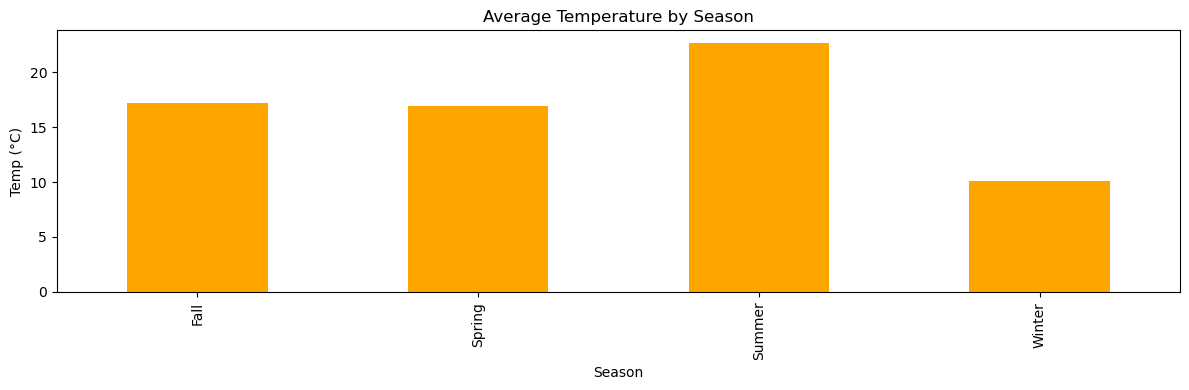

In [163]:
seasonal_avg = df.groupby('season')['AverageTemperature'].mean()
plt.figure(figsize=(12,4))
seasonal_avg.plot(kind='bar', color='orange')
plt.title('Average Temperature by Season')
plt.xlabel('Season')
plt.ylabel('Temp (°C)')
plt.tight_layout()
plt.show()

In [164]:
df['year'] = df['dt'].dt.year
yearly_avg = df.groupby('year')['AverageTemperature'].mean()

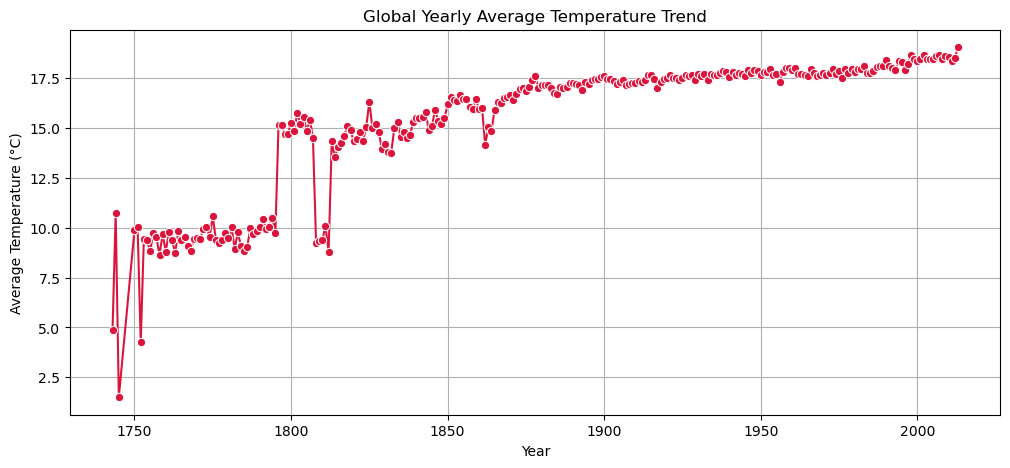

In [165]:
plt.figure(figsize=(12,5))
sns.lineplot(x=yearly_avg.index, y=yearly_avg.values, marker='o', color='crimson')
plt.title('Global Yearly Average Temperature Trend')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.grid(True)
plt.show()

In [166]:
india_df = df[df['Country'] == 'India']
india_df.loc[:, 'month'] = india_df['dt'].dt.month
india_monthly_avg = india_df.groupby('month')['AverageTemperature'].mean()

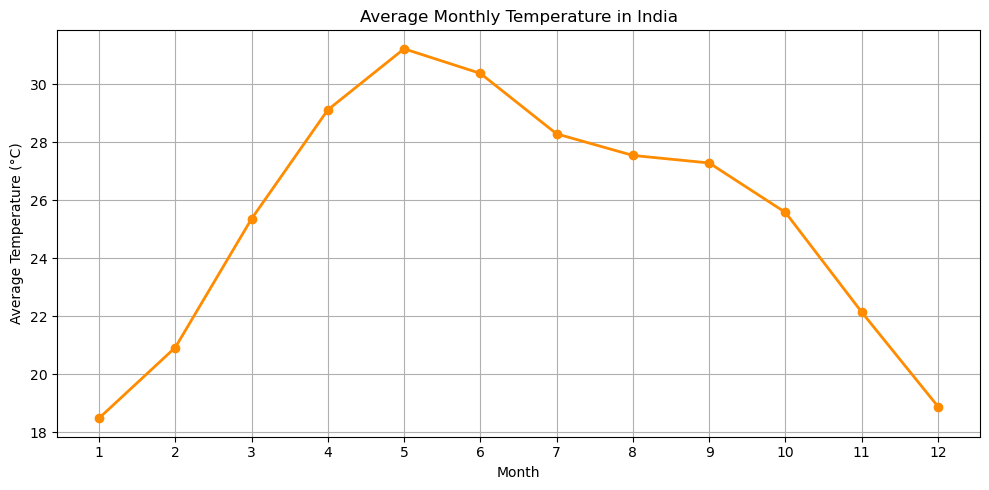

In [167]:
plt.figure(figsize=(10, 5))
plt.plot(india_monthly_avg.index, india_monthly_avg.values, marker='o', color='darkorange', linewidth=2)
plt.title('Average Monthly Temperature in India')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()

In [168]:
def classify_extreme_temp(temp):
    if temp > 40:
        return 'Hot'
    elif temp < 0:
        return 'Cold'
    else:
        return None

df['extreme_type'] = df['AverageTemperature'].apply(classify_extreme_temp)
extremes = df[df['extreme_type'].notna()]
extreme_counts = extremes.groupby(['year', 'extreme_type']).size().unstack().fillna(0)

In [169]:
print(extreme_counts.columns.tolist())


['Cold']


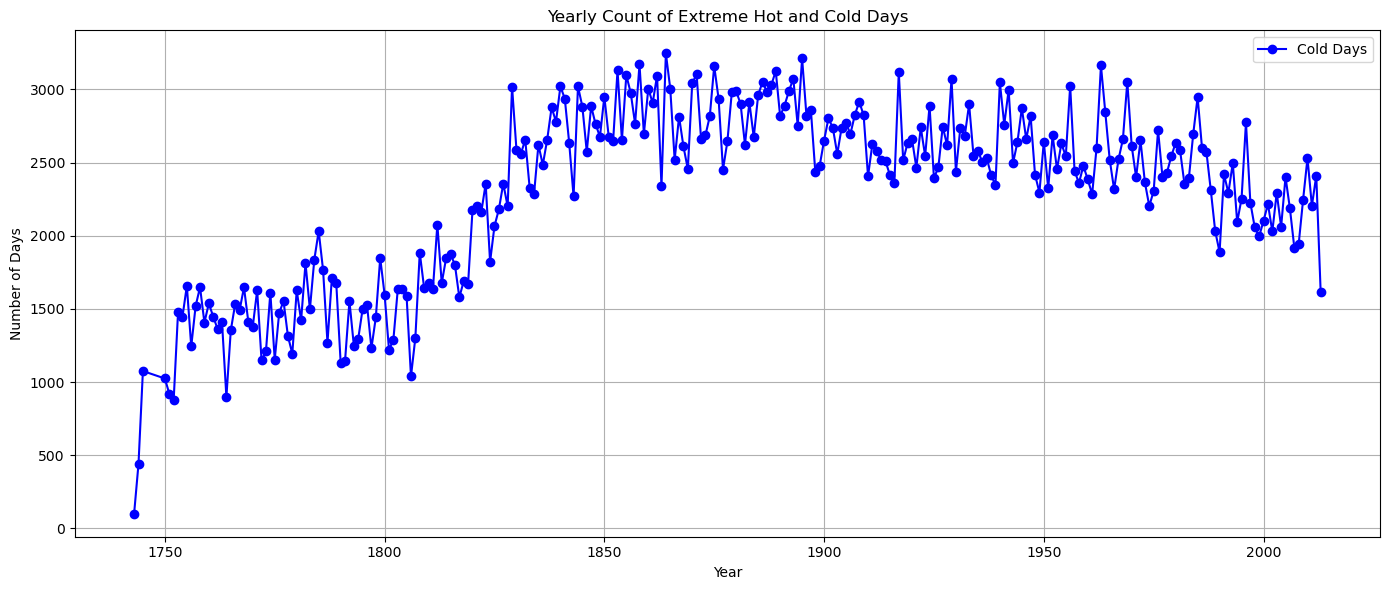

In [170]:
plt.figure(figsize=(14, 6))
plt.plot(extreme_counts.index, extreme_counts['Cold'], label='Cold Days', color='blue', marker='o')
plt.title('Yearly Count of Extreme Hot and Cold Days')
plt.xlabel('Year')
plt.ylabel('Number of Days')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [171]:
df['month'] = df['dt'].dt.month
df['year'] = df['dt'].dt.year
monthly_mean = df.groupby('month')['AverageTemperature'].mean()
df['monthly_mean'] = df['month'].map(monthly_mean)
df['temp_anomaly'] = df['AverageTemperature'] - df['monthly_mean']
yearly_anomaly = df.groupby('year')['temp_anomaly'].mean()

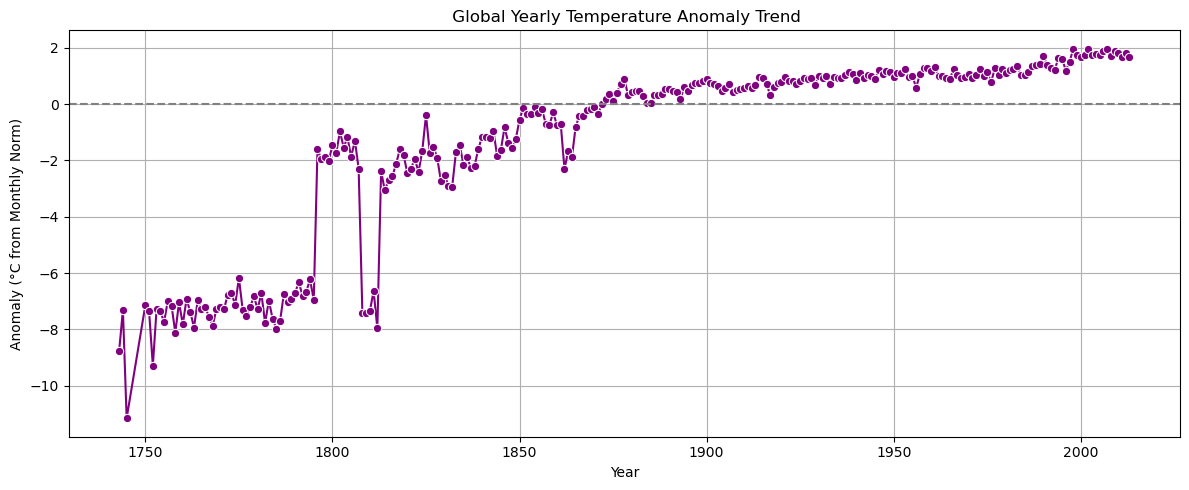

In [172]:
plt.figure(figsize=(12,5))
sns.lineplot(x=yearly_anomaly.index, y=yearly_anomaly.values, marker='o', color='purple')
plt.axhline(0, color='gray', linestyle='--')
plt.title(' Global Yearly Temperature Anomaly Trend')
plt.xlabel('Year')
plt.ylabel('Anomaly (°C from Monthly Norm)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [173]:
df['hemisphere'] = df['Latitude'].str[-1].map({'N': 'Northern', 'S': 'Southern'})
hemisphere_avg = df.groupby('hemisphere')['AverageTemperature'].mean()

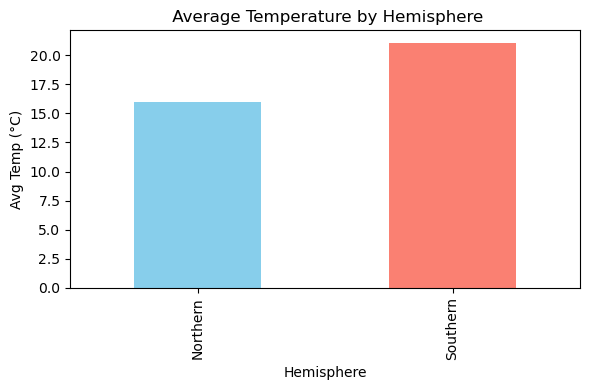

In [174]:
hemisphere_avg.plot(kind='bar', color=['skyblue', 'salmon'], figsize=(6,4))
plt.title(' Average Temperature by Hemisphere')
plt.ylabel('Avg Temp (°C)')
plt.xlabel('Hemisphere')
plt.tight_layout()
plt.show()

In [175]:
def parse_lat(lat_str):
    deg = float(lat_str[:-1])
    return deg if lat_str[-1] == 'N' else -deg

df['lat_deg'] = df['Latitude'].apply(parse_lat)

def classify_lat_band(lat):
    if abs(lat) <= 15:
        return 'Equatorial (0°–15°)'
    elif abs(lat) <= 30:
        return 'Tropical (15°–30°)'
    elif abs(lat) <= 45:
        return 'Subtropical (30°–45°)'
    elif abs(lat) <= 60:
        return 'Temperate (45°–60°)'
    else:
        return 'Polar (>60°)'

df['lat_band'] = df['lat_deg'].apply(classify_lat_band)
lat_band_avg = df.groupby('lat_band')['AverageTemperature'].mean().sort_index()

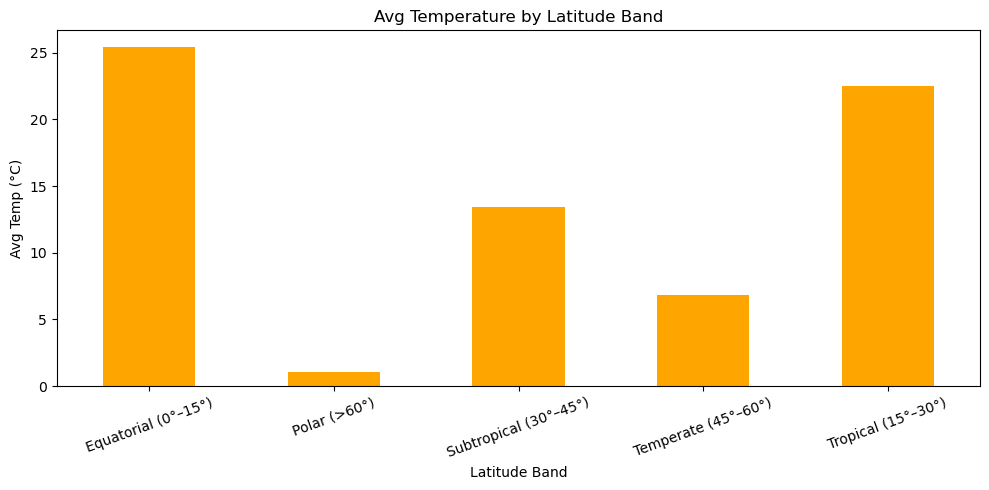

In [176]:
lat_band_avg.plot(kind='bar', color='orange', figsize=(10,5))
plt.title('Avg Temperature by Latitude Band')
plt.ylabel('Avg Temp (°C)')
plt.xlabel('Latitude Band')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

In [177]:
def parse_lon(lon_str):
    deg = float(lon_str[:-1])
    return deg if lon_str[-1] == 'E' else -deg

df['lon_deg'] = df['Longitude'].apply(parse_lon)

df['lon_bin'] = pd.cut(df['lon_deg'], bins=range(-180, 181, 30))

lon_bin_avg = df.groupby('lon_bin',observed=True)['AverageTemperature'].mean()

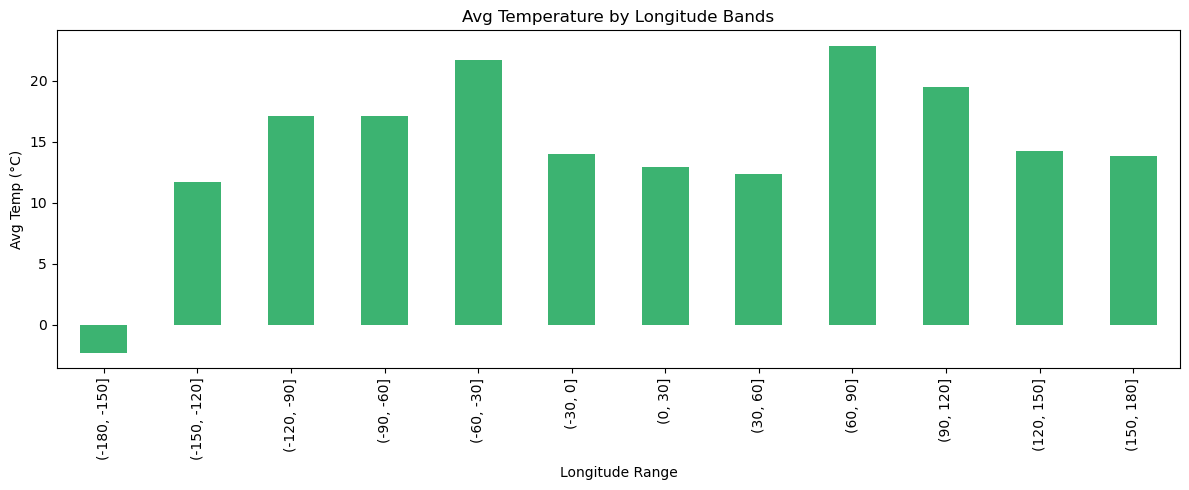

In [178]:
lon_bin_avg.plot(kind='bar', color='mediumseagreen', figsize=(12,5))
plt.title('Avg Temperature by Longitude Bands')
plt.ylabel('Avg Temp (°C)')
plt.xlabel('Longitude Range')
plt.tight_layout()
plt.show()

In [179]:
city_temp_std = df.groupby('City')['AverageTemperature'].std().sort_values(ascending=False)

print(" Cities with most variable temperatures:")
print(city_temp_std.head(10))

 Cities with most variable temperatures:
City
Heihe              16.462951
Blagoveshchensk    16.462951
Kyzyl              16.400921
Hailar             16.379748
Yakeshi            16.379748
Nehe               16.141122
Ust Ilimsk         15.848949
Hailun             15.712055
Beian              15.712055
Suihua             15.712055
Name: AverageTemperature, dtype: float64


In [180]:
from scipy.stats import skew, kurtosis

temps = df['AverageTemperature'].dropna()

skew_val = skew(temps)
kurt_val = kurtosis(temps)

print(f"Skewness: {skew_val:.3f} (positive = right tail)")
print(f" Kurtosis: {kurt_val:.3f} (positive = heavy tails)")


Skewness: -0.892 (positive = right tail)
 Kurtosis: 0.474 (positive = heavy tails)


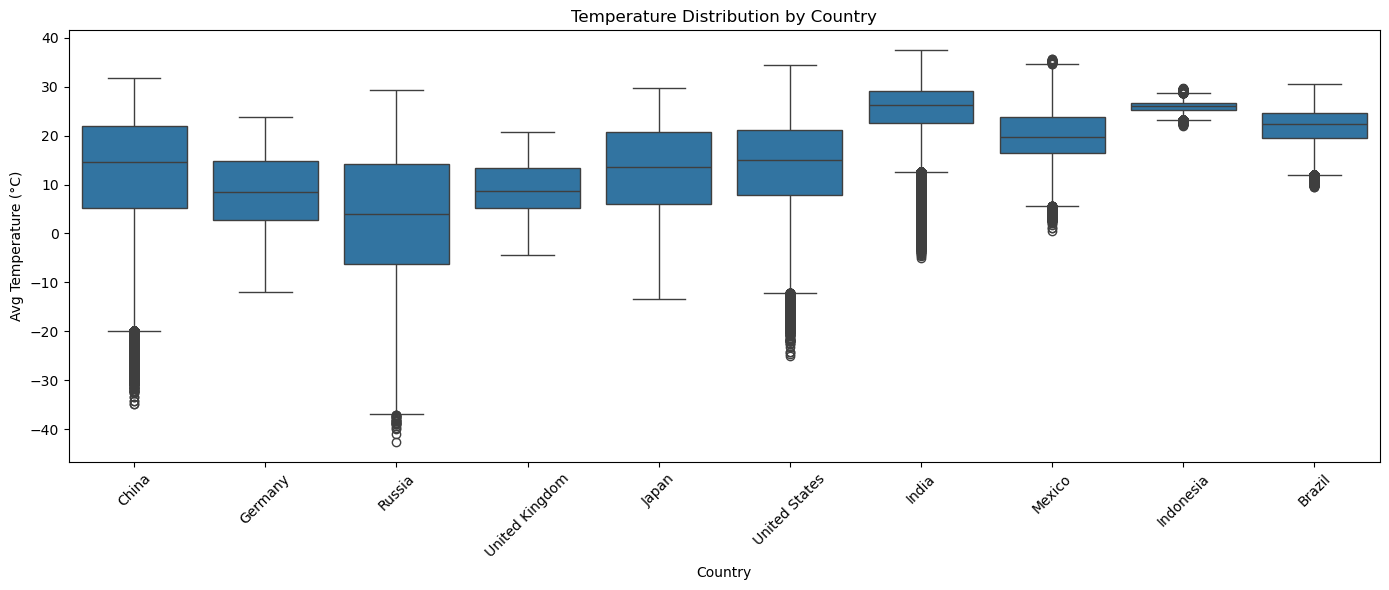

In [181]:

top_countries = df['Country'].value_counts().head(10).index
filtered_df = df[df['Country'].isin(top_countries)]

plt.figure(figsize=(14, 6))
sns.boxplot(data=filtered_df, x='Country', y='AverageTemperature')
plt.xticks(rotation=45)
plt.title('Temperature Distribution by Country')
plt.ylabel('Avg Temperature (°C)')
plt.tight_layout()
plt.show()


In [182]:
df['dt'] = pd.to_datetime(df['dt'])
df['month'] = df['dt'].dt.month

pivot = df.pivot_table(index='City', columns='month', values='AverageTemperature', aggfunc='mean')

pivot = pivot.dropna().head(5)  

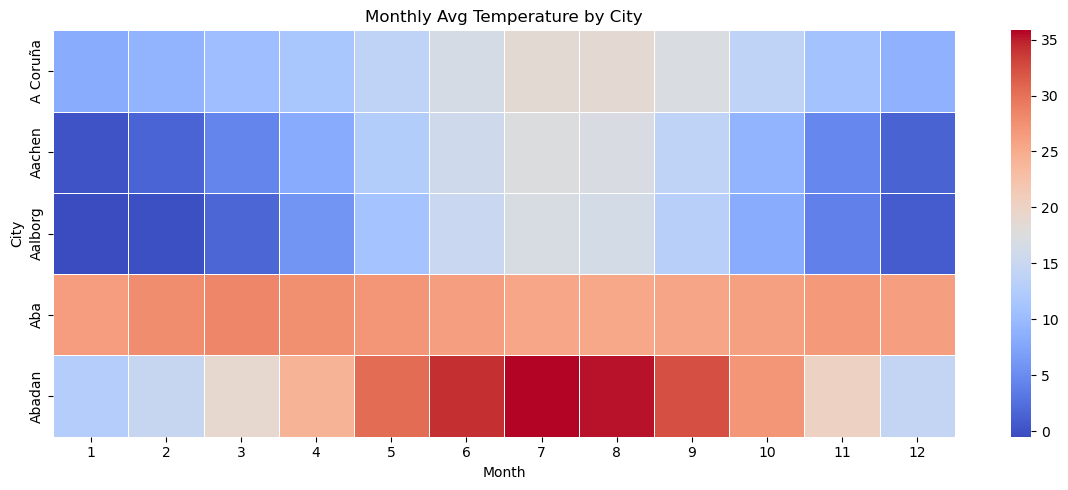

In [183]:
plt.figure(figsize=(12, 5))
sns.heatmap(pivot, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Monthly Avg Temperature by City')
plt.xlabel('Month')
plt.ylabel('City')
plt.tight_layout()
plt.show()

In [184]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

city_month = df.pivot_table(index='City', columns='month', values='AverageTemperature', aggfunc='mean')
city_month = city_month.dropna()

scaler = StandardScaler()
scaled = scaler.fit_transform(city_month)

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled)

city_month['Cluster'] = clusters


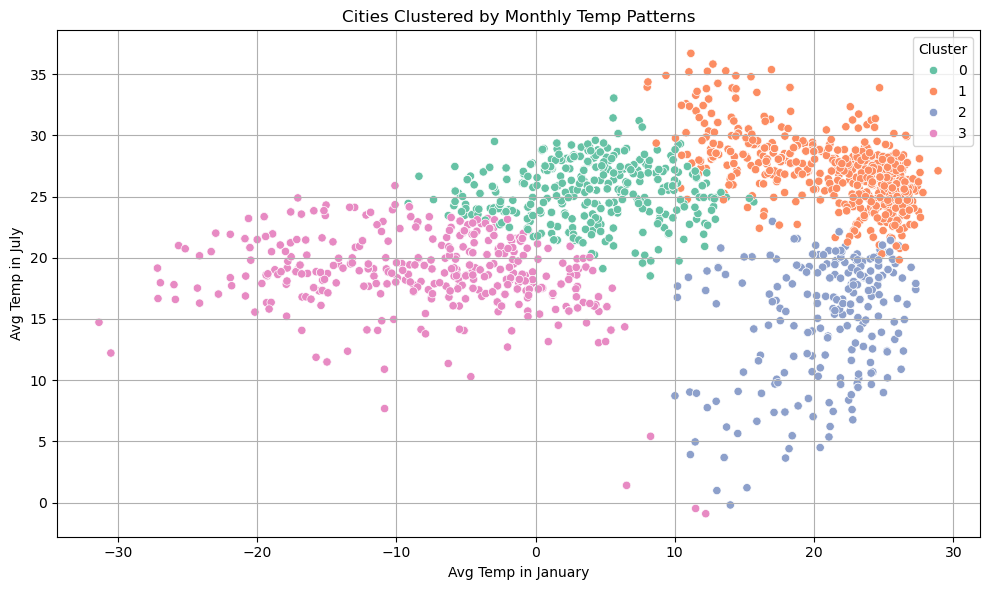

In [185]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=city_month[1], y=city_month[7], hue=city_month['Cluster'], palette='Set2')
plt.title('Cities Clustered by Monthly Temp Patterns')
plt.xlabel('Avg Temp in January')
plt.ylabel('Avg Temp in July')
plt.grid(True)
plt.tight_layout()
plt.show()

In [186]:
#Time Series Forecasting


In [288]:
df.columns

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude', 'month', 'season', 'year',
       'extreme_type', 'monthly_mean', 'temp_anomaly', 'hemisphere', 'lat_deg',
       'lat_band', 'lon_deg', 'lon_bin'],
      dtype='object')

In [290]:
df.isna().sum()

dt                                     0
AverageTemperature                     0
AverageTemperatureUncertainty          0
City                                   0
Country                                0
Latitude                               0
Longitude                              0
month                                  0
season                                 0
year                                   0
extreme_type                     7624002
monthly_mean                           0
temp_anomaly                           0
hemisphere                             0
lat_deg                                0
lat_band                               0
lon_deg                                0
lon_bin                                0
dtype: int64

In [292]:
city_df = df[df['City'] == 'Delhi'].copy()
city_df['dt'] = pd.to_datetime(city_df['dt'])

In [294]:
print(city_df.columns)

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude', 'month', 'season', 'year',
       'extreme_type', 'monthly_mean', 'temp_anomaly', 'hemisphere', 'lat_deg',
       'lat_band', 'lon_deg', 'lon_bin'],
      dtype='object')


In [320]:

print(monthly_temp.index.freq) 


None


In [324]:
monthly_temp = city_df['AverageTemperature'].resample('MS').mean().to_frame(name='temp')

# Rebuild index with fixed frequency
monthly_temp.index = pd.date_range(start=monthly_temp.index.min(), 
                                   periods=len(monthly_temp), 
                                   freq='MS')


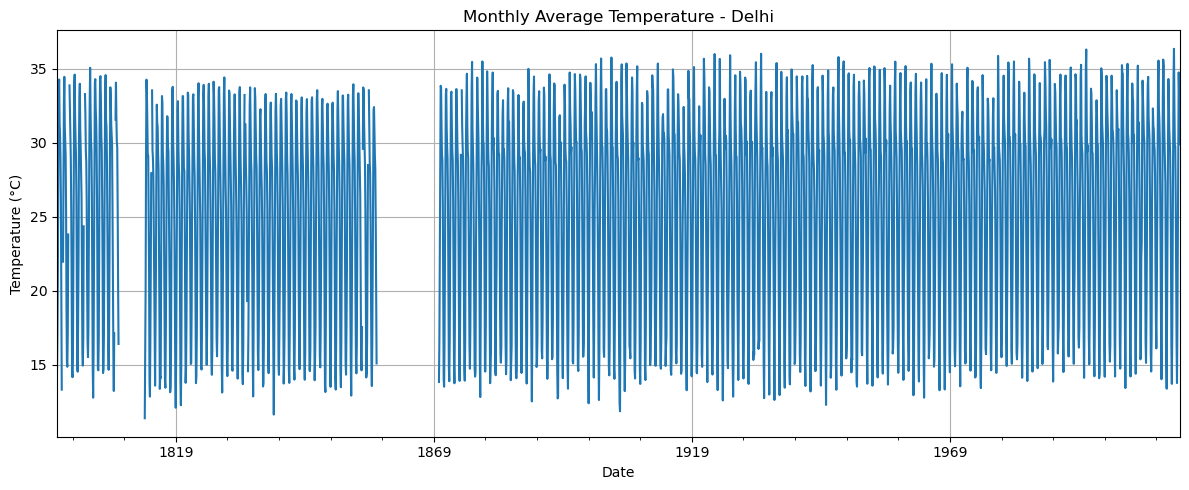

In [298]:
plt.figure(figsize=(12, 5))
monthly_temp['temp'].plot()
plt.title('Monthly Average Temperature - Delhi')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [300]:
monthly_temp.isna().sum()

temp    218
dtype: int64

In [302]:
monthly_temp = monthly_temp.dropna()


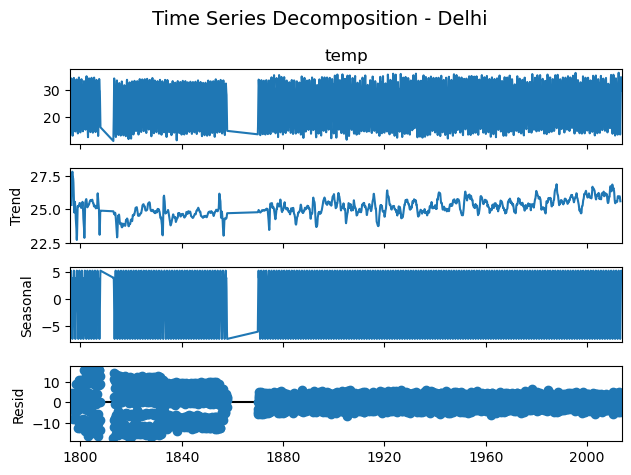

In [304]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(monthly_temp['temp'], model='additive', period=12)

decomposition.plot()
plt.suptitle(' Time Series Decomposition - Delhi', fontsize=14)
plt.tight_layout()
plt.show()


In [306]:
from statsmodels.tsa.stattools import adfuller

# Augmented Dickey-Fuller test
result = adfuller(monthly_temp['temp'].dropna())

print("ADF Statistic:", result[0])
print("p-value:", result[1])
for key, value in result[4].items():
    print(f'Critical Value {key}: {value}')

# If p < 0.05, series is stationary


ADF Statistic: -5.5378530504015595
p-value: 1.7283810099400264e-06
Critical Value 1%: -3.433116867651817
Critical Value 5%: -2.8627623570037133
Critical Value 10%: -2.5674207131174307


In [278]:
#As p<0.05 => d=0

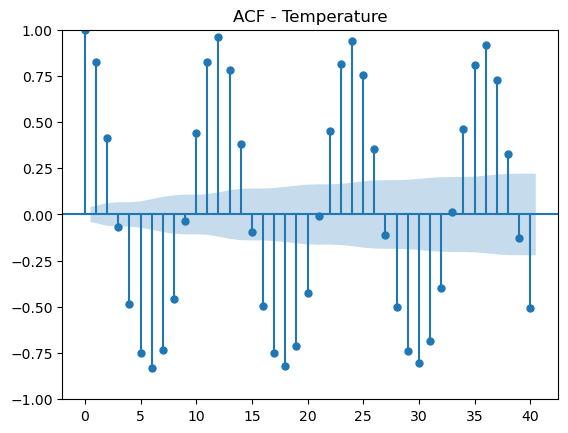

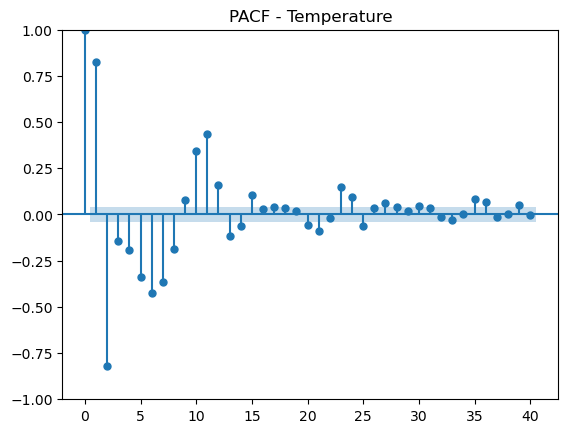

In [308]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(monthly_temp['temp'], lags=40)
plt.title('ACF - Temperature')
plt.show()

plot_pacf(monthly_temp['temp'], lags=40)
plt.title('PACF - Temperature')
plt.show()


In [282]:
#From observation we can see p=q=2

In [328]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(monthly_temp['temp'], order=(2,0,2))
model_fit = model.fit()

print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                   temp   No. Observations:                 2612
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -4929.333
Date:                Thu, 17 Jul 2025   AIC                           9870.666
Time:                        04:57:32   BIC                           9905.873
Sample:                    01-01-1796   HQIC                          9883.419
                         - 08-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.1718      0.038    665.488      0.000      25.098      25.246
ar.L1          1.6627      0.008    215.278      0.000       1.648       1.678
ar.L2         -0.9357      0.008   -120.244      0.0

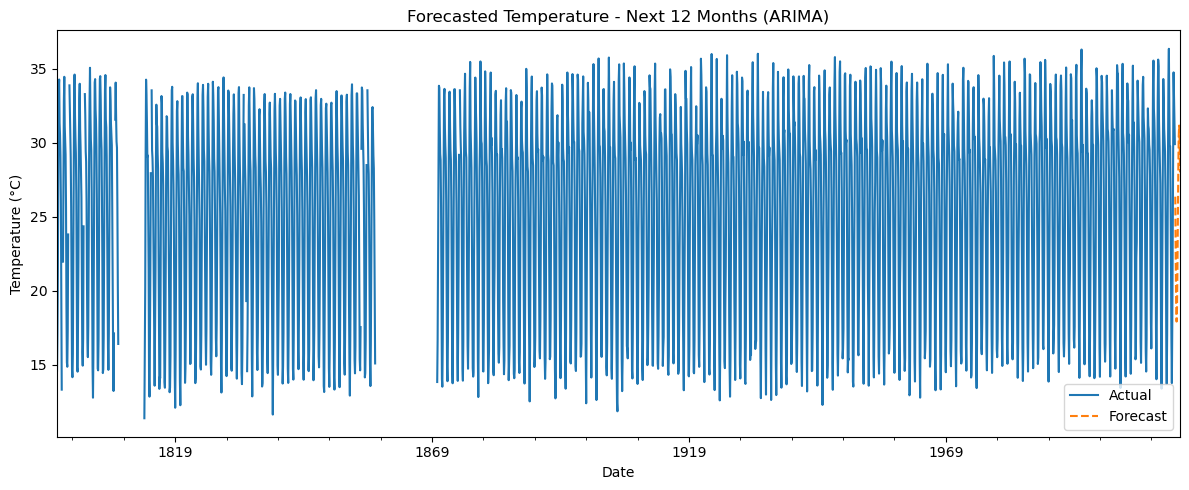

In [330]:
forecast = model_fit.forecast(steps=12)

last_date = monthly_temp.index[-1]
forecast_index = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=12, freq='MS')
forecast_df = pd.DataFrame({'Forecast': forecast}, index=forecast_index)

plt.figure(figsize=(12,5))
monthly_temp['temp'].plot(label='Actual')
forecast_df['Forecast'].plot(label='Forecast', style='--')
plt.title('Forecasted Temperature - Next 12 Months (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.tight_layout()
plt.show()


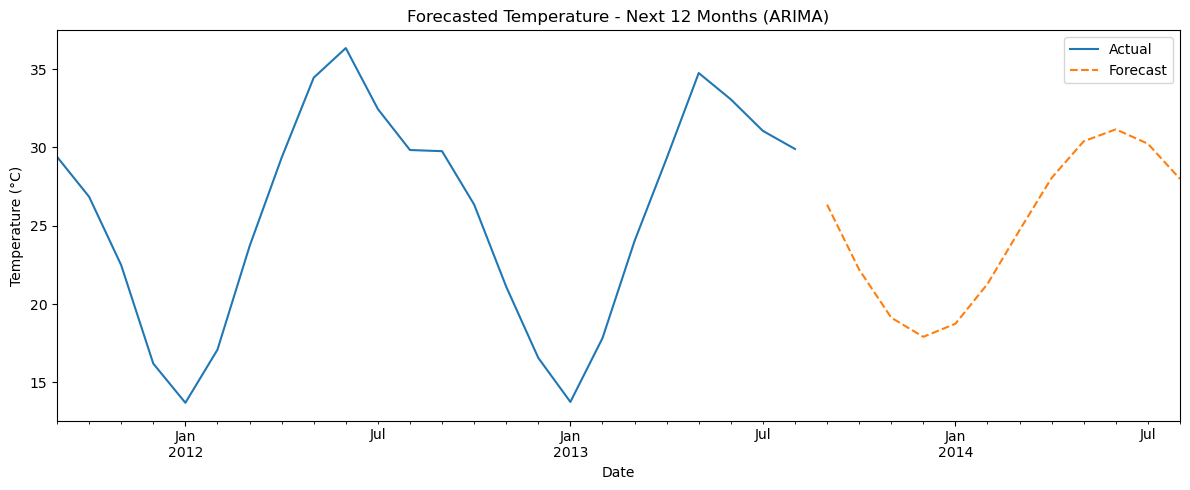

In [332]:
past_months = 24
plot_start = monthly_temp.index[-past_months]

plt.figure(figsize=(12,5))
monthly_temp['temp'].loc[plot_start:].plot(label='Actual')
forecast_df['Forecast'].plot(label='Forecast', style='--')
plt.title('Forecasted Temperature - Next 12 Months (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.tight_layout()
plt.show()